<img src="imagen_meli.jpg" alt="PROYECTO MeLi" width="300"/>

# Proyecto técnico MeLi - Jorge Rocha

Dentro del siguiente Notebook se presenta un modelo de clustering basado en KMeans.

# Introducción
- ¿Qué problema se quiso resolver con el desarrollo de la solución?

El problema que se intenta resolver es identificar grupos o patrones entre los sellers de MercadoLibre (MLM) en función de sus precios y cantidades disponibles. Esto podría ayudar a segmentar a los sellers en categorías que faciliten la toma de decisiones a los stakeholder.


# Fase de exploración 1.0
Se hace la consulta API para conocer las categorías MLM 

In [47]:
# importación de librerías 
import requests
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
# Realizar la solicitud a la API
response = requests.get('https://api.mercadolibre.com/sites/MLM/categories')

In [21]:
# Convertir la respuesta JSON en un DataFrame de pandas
data = response.json()

In [22]:
# Crear un DataFrame
df = pd.json_normalize(data)

In [23]:
# Visualizamos los datos
print (df)

           id                           name
0     MLM1747      Accesorios para Vehículos
1   MLM189530                           Agro
2     MLM1403            Alimentos y Bebidas
3     MLM1071            Animales y Mascotas
4     MLM1367     Antigüedades y Colecciones
5     MLM1368     Arte, Papelería y Mercería
6     MLM1743           Autos, Motos y Otros
7     MLM1384                          Bebés
8     MLM1246     Belleza y Cuidado Personal
9     MLM1039           Cámaras y Accesorios
10    MLM1051          Celulares y Telefonía
11    MLM1648                    Computación
12    MLM1144         Consolas y Videojuegos
13    MLM1500                   Construcción
14    MLM1276             Deportes y Fitness
15    MLM1575              Electrodomésticos
16    MLM1000     Electrónica, Audio y Video
17  MLM186863                   Herramientas
18    MLM1574        Hogar, Muebles y Jardín
19    MLM1499          Industrias y Oficinas
20    MLM1459                      Inmuebles
21    MLM1

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31 non-null     object
 1   name    31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


# Fase de exploración 1.1
Se hace la consulta API para conocer los Ítems de una categoría.

In [25]:
# se define una función para obtener los datos de la API de Ítems
def obtener_datos_api(cat_id, offset):
    # Construir la URL de la API
    url = f'https://api.mercadolibre.com/sites/MLM/search?category={cat_id}&offset={offset}'

# Realizar la solicitud a la API
    response = requests.get(url)

# Verificar si la solicitud fue exitosa
    if response.status_code == 200:       
        # Convertir la respuesta JSON en un DataFrame
        data = response.json()
        df = pd.json_normalize(data['results'])
        return df
    else:
        print(f"Error en la solicitud. Código de estado: {response.status_code}")
        return None

    
# se prepara el request para elegir el cat_id y offset deseado
cat_id_ejemplo = 'MLM1648'  # Reemplaza con el cat_id deseado
offset_ejemplo =  50       # Reemplaza con el offset deseado

# Obtener datos de la API y crear el DataFrame
df_resultados = obtener_datos_api(cat_id_ejemplo, offset_ejemplo)

# Mostrar el DataFrame resultante
if df_resultados is not None:
    print("DataFrame resultante:")
    print(df_resultados)

DataFrame resultante:
               id                                              title  \
0   MLM1448359807  Memoria Ram Fury Beast Ddr4 Gamer Color Negro ...   
1   MLM2323536524  Protector De Voltaje Para Refrigerador Y Enfri...   
2   MLM1941906597  Laptop  Gamer  Thunderobot Zero Ultra Plata Y ...   
3   MLM1448360784  Monitor Stylos Tech Stpmot3b Led 19  Negro 100...   
4   MLM2711719866              Ubiquiti Litebeam 5ac Gen2 Lbe5acgen2   
5   MLM1450127818  Memoria Usb Adata Uv250 Auv250-64g-rbk 64gb 2....   
6   MLM1420990710            Shure Sv200 Micrófono Vocal Color Negro   
7   MLM1966063055  Laptop Hp 14-dq0518la Celeron N4120 Ram 4gb Ss...   
8    MLM963537478  Disco Duro Externo Adata Ahd770g-2tu32g1 2tb N...   
9   MLM1919620459  Tablet  Chuwi HiPad Max 10.36  Con Red Móvil 1...   
10  MLM1810471431  Bocina Jbl Boombox 3 Portátil Con Bluetooth Wa...   
11  MLM1958523891  Papel Carta Scribe Class Bond Dorado - 1 Paque...   
12  MLM1993436929  Monitor Gamer Curvo Sam

In [13]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        45 non-null     object 
 1   title                     45 non-null     object 
 2   condition                 45 non-null     object 
 3   thumbnail_id              45 non-null     object 
 4   catalog_product_id        44 non-null     object 
 5   listing_type_id           45 non-null     object 
 6   permalink                 45 non-null     object 
 7   buying_mode               45 non-null     object 
 8   site_id                   45 non-null     object 
 9   category_id               45 non-null     object 
 10  domain_id                 45 non-null     object 
 11  thumbnail                 45 non-null     object 
 12  currency_id               45 non-null     object 
 13  order_backend             45 non-null     int64  
 14  price       

In [26]:
# se consulta la parte estadistica de de los Sellers
df_resultados.describe()

,order_backend,price,original_price,available_quantity,official_store_id,seller.id,installments.quantity,installments.amount,installments.rate,differential_pricing.id,installments
count,45.000000,45.000000,20.000000,45.000000,32.000000,1.500000e+01,31.000000,31.000000,31.000000,1.600000e+01,0.0
mean,24.955556,3879.071333,5523.953000,119.244444,5074.843750,3.287831e+08,19.903226,197.936774,36.314516,3.571338e+07,NaN
std,14.193397,5180.758971,5053.559004,163.946382,10079.840847,2.450771e+08,8.533678,206.517162,18.084483,8.139410e-01,NaN
min,1.000000,62.720000,139.000000,1.000000,229.000000,2.383836e+07,1.000000,7.860000,0.000000,3.571338e+07,NaN
25%,13.000000,677.000000,2749.000000,1.000000,2340.250000,1.750841e+08,24.000000,49.765000,45.030000,3.571338e+07,NaN
50%,25.000000,2149.000000,4520.035000,50.000000,3335.500000,2.257951e+08,24.000000,126.840000,45.030000,3.571338e+07,NaN
75%,36.000000,4999.000000,5999.000000,150.000000,4712.250000,5.463088e+08,24.000000,288.630000,45.030000,3.571338e+07,NaN
max,50.000000,28593.370000,18899.000000,500.000000,59662.000000,8.216315e+08,24.000000,749.880000,45.030000,3.571338e+07,NaN


In [32]:
    # Estadísticas descriptivas para 'price'
    estadisticas_price = df_resultados['price'].describe()
    print("Estadísticas para 'price':")
    print(estadisticas_price)

Estadísticas para 'price':
count       45.000000
mean      3879.071333
std       5180.758971
min         62.720000
25%        677.000000
50%       2149.000000
75%       4999.000000
max      28593.370000
Name: price, dtype: float64


In [33]:
    # Estadísticas descriptivas para 'available_quantity'
    estadisticas_quantity = df_resultados['available_quantity'].describe()
    print("\nEstadísticas para 'available_quantity':")
    print(estadisticas_quantity)


Estadísticas para 'available_quantity':
count     45.000000
mean     119.244444
std      163.946382
min        1.000000
25%        1.000000
50%       50.000000
75%      150.000000
max      500.000000
Name: available_quantity, dtype: float64


In [29]:
# Realizar la solicitud a la API para obtener datos sobre sellers
sellers = requests.get('https://api.mercadolibre.com/sites/MLM/search?category=MLM1648')
sellers_data = sellers.json()

# Imprimir la estructura de la respuesta JSON
print("Estructura de la respuesta JSON:")
print(sellers_data)

Estructura de la respuesta JSON:
{'site_id': 'MLM', 'country_default_time_zone': 'GMT-05:00', 'paging': {'total': 21416, 'primary_results': 1000, 'offset': 0, 'limit': 50}, 'results': [{'id': 'MLM1509389389', 'title': 'Micrófono Maono Au-pm421s Condensador Cardioide Color Negro', 'condition': 'new', 'thumbnail_id': '723429-MLA51229121361_082022', 'catalog_product_id': 'MLM19552950', 'listing_type_id': 'gold_pro', 'permalink': 'https://www.mercadolibre.com.mx/microfono-maono-au-pm421s-condensador-cardioide-color-negro/p/MLM19552950', 'buying_mode': 'buy_it_now', 'site_id': 'MLM', 'category_id': 'MLM10743', 'domain_id': 'MLM-MICROPHONES', 'thumbnail': 'http://http2.mlstatic.com/D_723429-MLA51229121361_082022-I.jpg', 'currency_id': 'MXN', 'order_backend': 3, 'price': 1213.39, 'original_price': 1277.25, 'sale_price': None, 'available_quantity': 50, 'official_store_id': 5281, 'official_store_name': 'MAONO', 'use_thumbnail_id': True, 'accepts_mercadopago': True, 'shipping': {'store_pick_up':

In [30]:
# Realizar la solicitud a la API para obtener datos sobre sellers
import requests
cats = requests.get('https://api.mercadolibre.com/sites/MLM/search?category=MLM1648')
cats.json()

{'site_id': 'MLM',
 'country_default_time_zone': 'GMT-05:00',
 'paging': {'total': 21416, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLM1509389389',
   'title': 'Micrófono Maono Au-pm421s Condensador Cardioide Color Negro',
   'condition': 'new',
   'thumbnail_id': '723429-MLA51229121361_082022',
   'catalog_product_id': 'MLM19552950',
   'listing_type_id': 'gold_pro',
   'permalink': 'https://www.mercadolibre.com.mx/microfono-maono-au-pm421s-condensador-cardioide-color-negro/p/MLM19552950',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLM',
   'category_id': 'MLM10743',
   'domain_id': 'MLM-MICROPHONES',
   'thumbnail': 'http://http2.mlstatic.com/D_723429-MLA51229121361_082022-I.jpg',
   'currency_id': 'MXN',
   'order_backend': 3,
   'price': 1213.39,
   'original_price': 1277.25,
   'sale_price': None,
   'available_quantity': 50,
   'official_store_id': 5281,
   'official_store_name': 'MAONO',
   'use_thumbnail_id': True,
   'accepts_mercadopago': Tr

# Fase de exploración 1.2
Se hace la consulta API con la descripción de un atributo de un ítem

In [35]:
# Realizar la solicitud a la API
response = requests.get('https://api.mercadolibre.com/items/MLM1448359807#options')
cats.json()

# Convertir la respuesta JSON en un DataFrame de pandas
data = response.json()

# Crear un DataFrame
df = pd.json_normalize(data)

# Visualizamos los datos
    #df.head(20)
print (df)

              id site_id                                              title  \
0  MLM1448359807     MLM  Memoria Ram Fury Beast Ddr4 Gamer Color Negro ...   

   seller_id category_id  official_store_id  price  base_price original_price  \
0  175084057     MLM1694               1714    433         433           None   

  currency_id  ...  seller_address.city.name seller_address.state.id  \
0         MXN  ...               Guadalajara                  MX-JAL   

  seller_address.state.name seller_address.country.id  \
0                   Jalisco                        MX   

  seller_address.country.name seller_address.search_location.city.id  \
0                      Mexico                        TUxNQ0dVQTYxNjE   

  seller_address.search_location.city.name  \
0                              Guadalajara   

  seller_address.search_location.state.id  \
0                         TUxNUEpBTDM3MTg   

  seller_address.search_location.state.name seller_address.id  
0                        

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id                                         1 non-null      object
 1   site_id                                    1 non-null      object
 2   title                                      1 non-null      object
 3   seller_id                                  1 non-null      int64 
 4   category_id                                1 non-null      object
 5   official_store_id                          1 non-null      int64 
 6   price                                      1 non-null      int64 
 7   base_price                                 1 non-null      int64 
 8   original_price                             0 non-null      object
 9   currency_id                                1 non-null      object
 10  initial_quantity                          

In [36]:
# otra forma para conocer la decrpción de un Ítem
import requests
cats = requests.get('https://api.mercadolibre.com/items/MLM1448359807#options')
cats.json()

{'id': 'MLM1448359807',
 'site_id': 'MLM',
 'title': 'Memoria Ram Fury Beast Ddr4 Gamer Color Negro  8gb 1 Kingston Kf432c16bb/8',
 'seller_id': 175084057,
 'category_id': 'MLM1694',
 'official_store_id': 1714,
 'price': 433,
 'base_price': 433,
 'original_price': None,
 'currency_id': 'MXN',
 'initial_quantity': 6514,
 'sale_terms': [{'id': 'WARRANTY_TIME',
   'name': 'Tiempo de garantía',
   'value_id': None,
   'value_name': '12 meses',
   'value_struct': {'number': 12, 'unit': 'meses'},
   'values': [{'id': None,
     'name': '12 meses',
     'struct': {'number': 12, 'unit': 'meses'}}],
   'value_type': 'number_unit'},
  {'id': 'WARRANTY_TYPE',
   'name': 'Tipo de garantía',
   'value_id': '2230279',
   'value_name': 'Garantía de fábrica',
   'value_struct': None,
   'values': [{'id': '2230279',
     'name': 'Garantía de fábrica',
     'struct': None}],
   'value_type': 'list'}],
 'buying_mode': 'buy_it_now',
 'listing_type_id': 'gold_special',
 'condition': 'new',
 'permalink': 'h

# Modelo de Clustering

Para ayudar al equipo comercial a identificar sellers relevantes, 
vamos a utilizar un modelo de clustering sobre las categorías de productos. 
Además, podemos proporcionar información estadística sobre el perfil de los sellers 
en cada cluster.


# Fase 1 "Codo de Jambú"
Se útiliza esta técnica para poder identificar el número optimo de cluster para nuestro modelo.

Definición: consiste en ir creando diferentes cantidades de clusters y calculando que tan similares son los individuos dentro de los mismos, e ir plasmado esta información en una gráfica

In [39]:
import requests
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [40]:
# Función para obtener datos de la API
def obtener_datos_api(category_id):
    url = f'https://api.mercadolibre.com/sites/MLM/search?category={category_id}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['results'])
        return df
    else:
        print(f"Error en la solicitud. Código de estado: {response.status_code}")
        return None

In [41]:
# Obtener datos de la API para una categoría específica
category_id = 'MLM1648'
df_data = obtener_datos_api(category_id)

In [42]:
# Seleccionar características relevantes para clustering (por ejemplo, 'price', 'sold_quantity')
features = df_data[['price', 'available_quantity']]

In [43]:
# Escalar las características para que tengan media cero y varianza unitaria
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [44]:
# Calcular la inercia para diferentes números de clusters
inercia = []
max_clusters = 10

In [45]:
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inercia.append(kmeans.inertia_)

C:\Users\AlbertoMorales\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


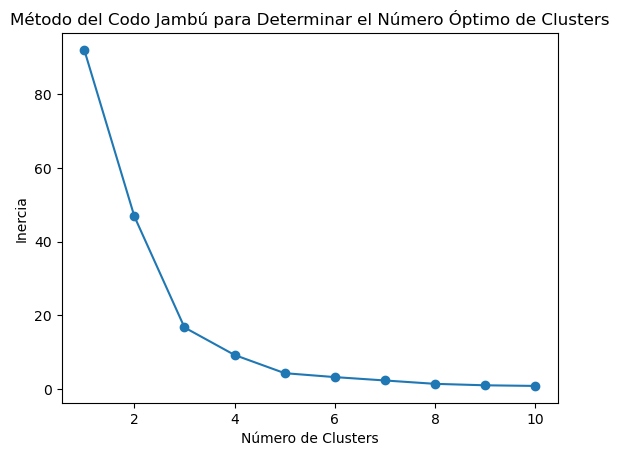

In [46]:
# Graficar el método del codo
plt.plot(range(1, max_clusters + 1), inercia, marker='o')
plt.title('Método del Codo Jambú para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

Está técnica utiliza la inercia (suma de los cuadrados intra-cluster) para evaluar el número óptimo de clusters.
Podemos deducir que el punto de quiebre del codo de jambú se encuentra entre los 3 y 4 clusters óptimos para nuestro modelo.

# Confirmación de clusters optimos

La visualización de codo nos ayudará a determinar cuántos clusters son apropiados para nuestro conjunto de datos.

In [109]:
import requests
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [110]:
def obtener_datos_api(cat_id, offset):
    url = f'https://api.mercadolibre.com/sites/MLM/search?category={cat_id}&offset={offset}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['results'])
        return df
    else:
        print(f"Error en la solicitud. Código de estado: {response.status_code}")
        return None

In [111]:
# Ejemplo de uso con cat_id y offset específicos
cat_id_ejemplo = 'MLM1648'  # Reemplaza con el cat_id deseado
offset_ejemplo = 100        # Reemplaza con el offset deseado

In [112]:
# Obtener datos de la API y crear el DataFrame
df_resultados = obtener_datos_api(cat_id_ejemplo, offset_ejemplo)

In [113]:
# Seleccionar características relevantes para clustering (price y available_quantity)
features = df_resultados[['price', 'available_quantity']]

In [114]:
# Escalar las características para que tengan media cero y varianza unitaria
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

C:\Users\AlbertoMorales\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


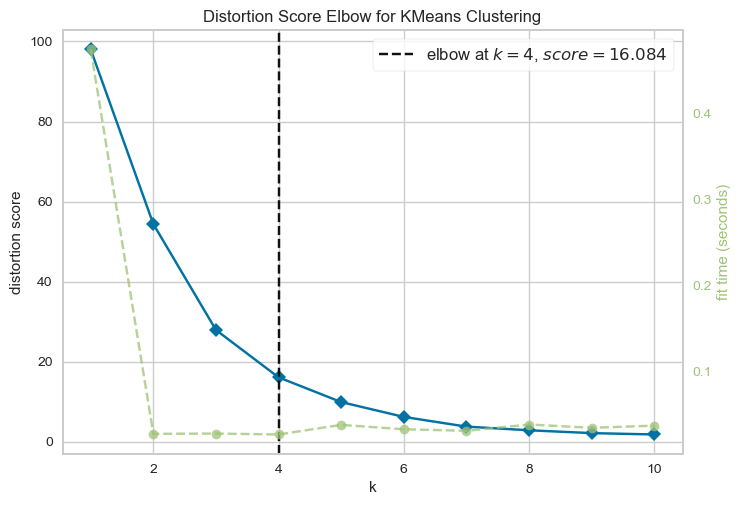

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
# Visualización del gráfico de p-values
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion')
visualizer.fit(features_scaled)
visualizer.show()


- Podemos inferir que con las variables (price, available_quantity) el número optimo de clusters son 4

# Modelo de Clustering - K-Means

Para ayudar al equipo comercial a identificar sellers relevantes, 
podemos utilizar un modelo de clustering sobre las categorías de productos. 
Además, podemos proporcionar información estadística sobre el perfil de los sellers 
en cada cluster.
Voy a utilizar K-Means para realizar el clustering y 
proporcionar algunas estadísticas descriptivas.

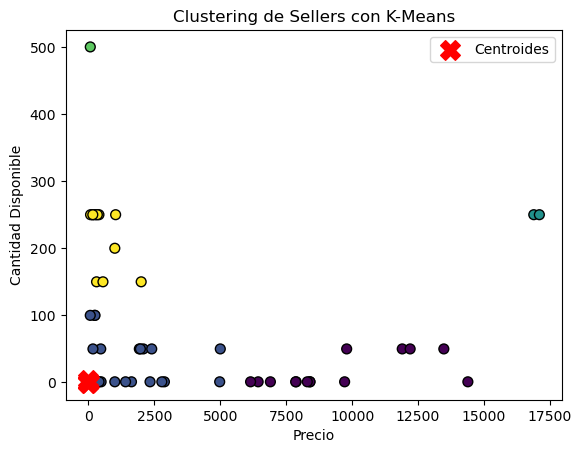

DataFrame resultante con Clasificación por Clusters:
               id                                              title  \
0   MLM1410750203  Disco Duro Externo Adata Hd710 Pro Ahd710p-4tu...   
1   MLM1991777041  iPad  Apple  10th Generation 2022 A2696 10.9  ...   
2    MLM912773175  Brother Hl1212w Impresora Láser Wi-fi Negro/bl...   
3   MLM1984576659  50 Rollos Papel Termico Miniprinter 57x40 Impr...   
4    MLM834203221  Impresora Multifunción Kyocera Ecosys F50 Blan...   
5   MLM1947056297  Ultrabook  Machenike L16 L16air Plateada 16pul...   
6   MLM1905117823  2 Unids Micrófono Inalámbrico Lavalier Para iP...   
7   MLM1931568517  Monitor Gamer Samsung Odyssey G5 Led Qhd 165hz...   
8   MLM1983997925                         Galaxy Tab A9+ Color Plata   
9   MLM1938882933  Memoria Ram Gamer Color Verde  8gb 1x8gb Nansi...   
10  MLM2195078704             Monitor Gamer Crua G220a Led 22  Negro   
11  MLM1930855171  Notebook Hp 15.6' 256gb Ssd / 8gb Ram Intel I3...   
12  MLM1926

In [58]:
import requests
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def obtener_datos_api(cat_id, offset):
    url = f'https://api.mercadolibre.com/sites/MLM/search?category={cat_id}&offset={offset}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['results'])
        return df
    else:
        print(f"Error en la solicitud. Código de estado: {response.status_code}")
        return None

# Ejemplo de uso con cat_id y offset específicos
cat_id_ejemplo = 'MLM1648'  # Reemplaza con el cat_id deseado
offset_ejemplo = 200  # Reemplaza con el offset deseado

# Obtener datos de la API y crear el DataFrame
df_resultados = obtener_datos_api(cat_id_ejemplo, offset_ejemplo)

# Seleccionar características relevantes para clustering (price y available_quantity)
features = df_resultados[['price', 'available_quantity']]

# Escalar las características para que tengan media cero y varianza unitaria
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar K-Means con un número de 4 clusters
kmeans = KMeans(n_clusters=4, random_state=200)
df_resultados['cluster'] = kmeans.fit_predict(features_scaled)

# Visualizar los clusters
plt.scatter(df_resultados['price'], df_resultados['available_quantity'], c=df_resultados['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroides')
plt.title('Clustering de Sellers con K-Means')
plt.xlabel('Precio')
plt.ylabel('Cantidad Disponible')
plt.legend()
plt.show()

# Mostrar el DataFrame resultante con la clasificación por clusters
print("DataFrame resultante con Clasificación por Clusters:")
print(df_resultados)

In [1]:
import requests
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# se define una función para obtener los datos de la API de Ítems
def obtener_datos_api(cat_id, offset):
    url = f'https://api.mercadolibre.com/sites/MLM/search?category={cat_id}&offset={offset}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['results'])
        return df
    else:
        print(f"Error en la solicitud. Código de estado: {response.status_code}")
        return None

In [3]:
# Ejemplo de uso con cat_id y offset específicos
cat_id_ejemplo = 'MLM1648'  # Reemplaza con el cat_id deseado
offset_ejemplo = 200         # Reemplaza con el offset deseado

In [4]:
# Obtener datos de la API y crear el DataFrame
df_resultados = obtener_datos_api(cat_id_ejemplo, offset_ejemplo)

In [5]:
# Seleccionar características relevantes para clustering (price y available_quantity)
features = df_resultados[['price', 'available_quantity']]

In [6]:
# Escalar las características para que tengan media cero y varianza unitaria
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
# Aplicar K-Means con un número arbitrario de clusters (3 en este caso)
kmeans = KMeans(n_clusters=4, random_state=200)
df_resultados['cluster'] = kmeans.fit_predict(features_scaled)

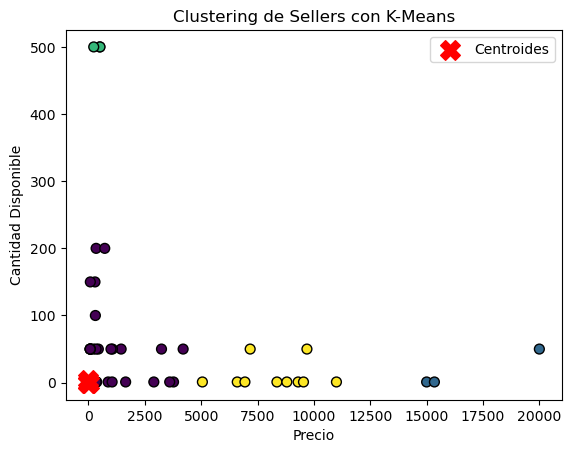

In [8]:
# Visualizar los clusters
plt.scatter(df_resultados['price'], df_resultados['available_quantity'], c=df_resultados['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroides')
plt.title('Clustering de Sellers con K-Means')
plt.xlabel('Precio')
plt.ylabel('Cantidad Disponible')
plt.legend()
plt.show()

In [9]:
# Mostrar el DataFrame resultante con la clasificación por clusters
print("DataFrame resultante con Clasificación por Clusters:")
print(df_resultados)

DataFrame resultante con Clasificación por Clusters:
               id                                              title  \
0   MLM2662497182  Limpiador Para Pantallas Y Paño Sin Estática S...   
1   MLM1769233984  Hp Laptop 14-dq0505la Intel Pentium 8gb Ram 25...   
2   MLM1842124552  Apple iPad Mini 6ta Gen Wifi 64gb Touch Id Bla...   
3   MLM1997260695  Disco Duro Interno Western Digital Wd Green Po...   
4   MLM2199659336  Cable Hdmi 10 Metros Full Hd 1080p Ps3 Xbox 36...   
5   MLM2612836288  Base Soporte De Pantalla Pared Tv 14 A 55 Pulg...   
6   MLM2008045618  Audífonos Gamer Kotion G2000 Negro Y Azul Con ...   
7   MLM2577600592  Laptop Acer Aspire Vero Core I5-12a 10 Núcleo ...   
8   MLM2248717042  iPad  Apple  10th Generation 2022 A2696 10.9  ...   
9   MLM1949867285  Cable Usb A B Macho 5m Impresora Escaner Multi...   
10  MLM1941638947  Gio Cable Hdmi 15 Metros Full Hd 1080p Blindad...   
11  MLM1364818916  Memoria Ram Fury Impact Ddr4 Gamer Color Negro...   
12  MLM2341

In [77]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        45 non-null     object 
 1   title                     45 non-null     object 
 2   condition                 45 non-null     object 
 3   thumbnail_id              45 non-null     object 
 4   catalog_product_id        44 non-null     object 
 5   listing_type_id           45 non-null     object 
 6   permalink                 45 non-null     object 
 7   buying_mode               45 non-null     object 
 8   site_id                   45 non-null     object 
 9   category_id               45 non-null     object 
 10  domain_id                 45 non-null     object 
 11  thumbnail                 45 non-null     object 
 12  currency_id               45 non-null     object 
 13  order_backend             45 non-null     int64  
 14  price       

# Vamos analizar los resultados del modelo mediante algunas métricas de estadística 

In [10]:
# Distribución de Sellers en Cada Cluster: Número de sellers en cada cluster.

distribucion_clusters = df_resultados['cluster'].value_counts()
print(distribucion_clusters)

0    34
3    10
2     3
1     3
Name: cluster, dtype: int64


# Perfil de Cluster:

Usaremos estadísticas descriptivas para cada cluster, como media, mediana y la desviación estándar, para entender el perfil de cada grupo.


In [11]:
# Estadísticas Descriptivas
estadisticas_clusters = df_resultados.groupby('cluster')[['price', 'available_quantity']].describe()
print(estadisticas_clusters)

        price                                                            \
        count          mean          std       min        25%       50%   
cluster                                                                   
0        34.0    884.778824  1202.677151     42.00    114.020    336.00   
1         3.0  16780.660000  2792.496565  14999.00  15171.490  15343.98   
2         3.0    415.040000   157.327120    233.52    366.510    499.50   
3        10.0   8244.750000  1780.226021   5053.10   6998.115   8579.12   

                             available_quantity                                \
                75%      max              count        mean        std    min   
cluster                                                                         
0         1036.5000   4199.0               34.0   43.117647  56.220758    1.0   
1        17671.4900  19999.0                3.0   17.333333  28.290163    1.0   
2          505.8000    512.1                3.0  500.000000   0.00000

# Análisis de Varianza (ANOVA):

Análisis de varianza para verificar si hay diferencias significativas entre los clusters en términos de 'price' y 'available_quantity'.

In [12]:
from scipy.stats import f_oneway

grupo0 = df_resultados[df_resultados['cluster'] == 0]['price']
grupo1 = df_resultados[df_resultados['cluster'] == 1]['price']
grupo2 = df_resultados[df_resultados['cluster'] == 2]['price']
grupo3 = df_resultados[df_resultados['cluster'] == 3]['price']

resultado_anova_price = f_oneway(grupo0, grupo1, grupo2, grupo3)
print("Análisis de Varianza (ANOVA) para 'price':", resultado_anova_price)

Análisis de Varianza (ANOVA) para 'price': F_onewayResult(statistic=169.0116920131046, pvalue=7.627438348257837e-25)


# Gráfico de Dispersión por Cluster:

Para analizar un poco más a detalle la distribución de cluster's mostraremos un "grafico de dispersión" tomando en cuenta las variables que usamos en el modelos (price vs. available_quantity), coloreando los puntos según el cluster al que pertenecen.

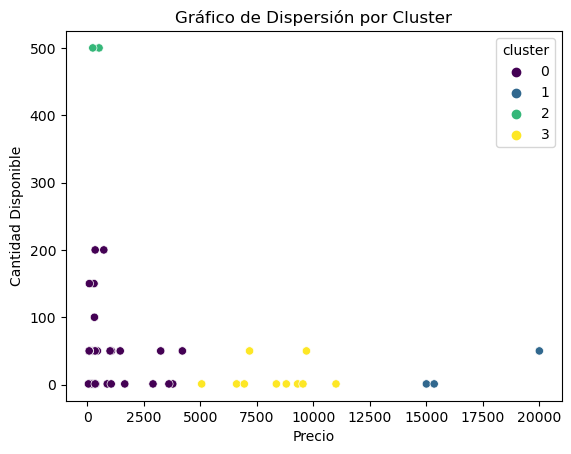

In [13]:
import seaborn as sns

sns.scatterplot(x='price', y='available_quantity', hue='cluster', data=df_resultados, palette='viridis')
plt.title('Gráfico de Dispersión por Cluster')
plt.xlabel('Precio')
plt.ylabel('Cantidad Disponible')
plt.show()

# Histogramas por Cluster:

Esta técnica nos ayuda a tener un histograma por cada variable de cada cluster y nos ayuda a visualizar la distribución de los valores entre cada cluster.


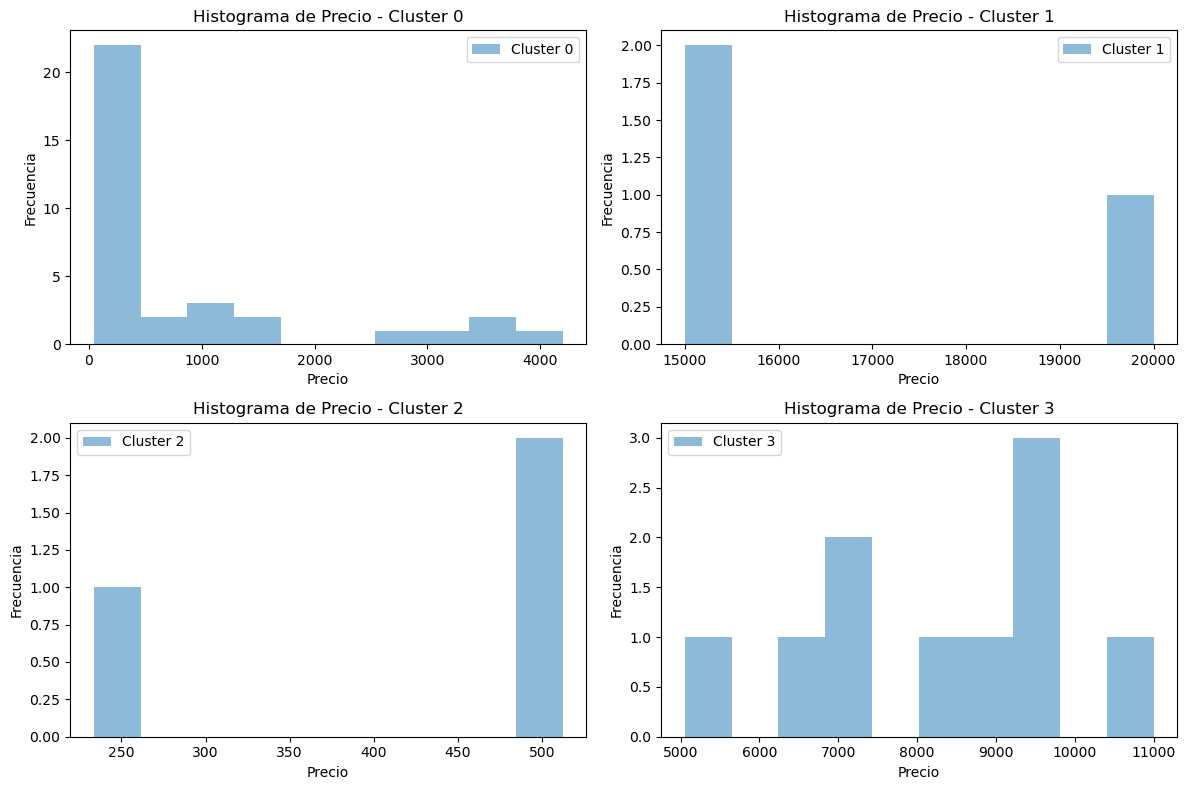

In [14]:
plt.figure(figsize=(12, 8))
for cluster in df_resultados['cluster'].unique():
    plt.subplot(2, 2, cluster+1)
    plt.hist(df_resultados[df_resultados['cluster'] == cluster]['price'], alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Histograma de Precio - Cluster {cluster}')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.legend()
plt.tight_layout()
plt.show()


# Density plots

Es muy similar a un histograma con la diferencia de que la función de desidad contiene valores continuos.

El Density Plot puede ayudar a visualizar cómo se distribuyen los precios dentro de cada cluster. Puedes identificar si un cluster tiene una concentración de productos con precios bajos, altos o una distribución más uniforme.

Text(0, 0.5, 'Densidad')

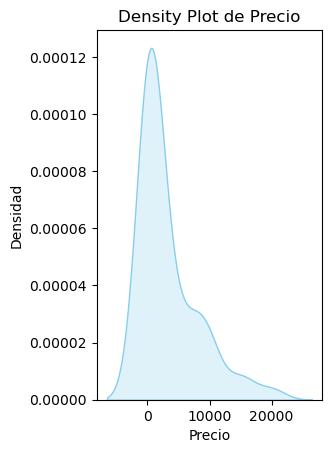

In [21]:
# Density Plot de la variable 'price'
plt.subplot(1, 2, 2)
sns.kdeplot(df_resultados['price'], fill=True, color='skyblue')
plt.title('Density Plot de Precio')
plt.xlabel('Precio')
plt.ylabel('Densidad')

Al ver el grafico anterior no nos dice mucho, ya que todo esta concentrado hacia un precio muy bajo, por lo que usaremos el density ploot por cada cluster...

# Distribución de Precios por Cluster: 

El Density Plot puede ayudar a visualizar cómo se distribuyen los precios dentro de cada cluster. Se puede identificar si un cluster tiene una concentración de productos con precios bajos, altos o una distribución más uniforme.

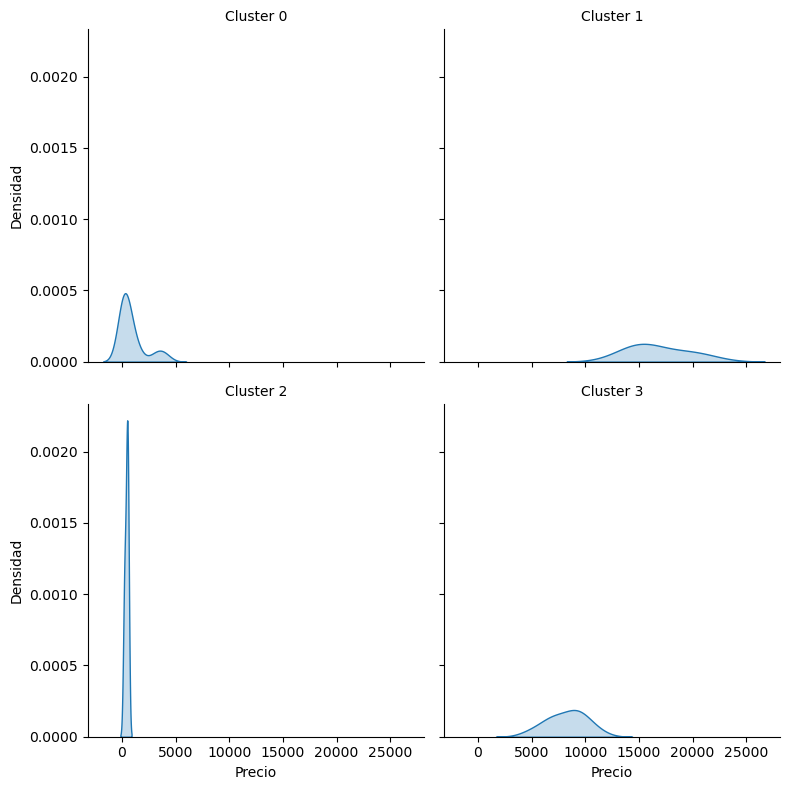

In [16]:
# Crear subgráficos para cada cluster
g = sns.FacetGrid(df_resultados, col="cluster", col_wrap=2, height=4)
g.map(sns.kdeplot, 'price', fill=True)

# Ajustar el diseño
g.set_axis_labels('Precio', 'Densidad')
g.set_titles('Cluster {col_name}')
plt.show()


# Puntos clave y conclusiones 

# ¿Qué problema se quiso resolver con el desarrollo de la solución?

El problema que se intenta resolver es identificar grupos o patrones entre los sellers de MercadoLibre en función de sus precios y cantidades disponibles. Esto podría ayudar a segmentar a los sellers en categorías que faciliten la toma de decisiones comerciales.


# ¿Qué información buscaste y utilizaste para el desarrollo de la solución? Incluye las hipótesis que te llevaron a descargar dicha información.

Se buscó información sobre sellers de MercadoLibre (MLM), especialmente relacionada con 'price' y 'available_quantity'. 
La hipótesis podría ser que la agrupación de sellers basada en estas características podría revelar patrones de comportamiento de precios y disponibilidad.


# Muestra los insights más relevantes que hayas obtenido de tu análisis exploratorio. ¿Cómo estos te guiaron a la hora de plantear la solución?

Insights relevantes podrían incluir la identificación de clusters distintivos de sellers con comportamientos de precios y disponibilidad similares. Estos insights podrían guiar la formulación de la solución al proporcionar una comprensión más profunda de la distribución y variabilidad de los sellers en función de estas características.

Aún que lo recomendable sería hacer una exploración más profunda en la información ya que al hacer un análisis de variables cualitativas podemos combinarlas con métricas cuantitativas y poder tener un mejor modelo o reentrenar el mismo. 


# Danos un contexto de la solución que escogiste, y cómo la abordaste. ¿Qué metodologías aplicaste? ¿Qué métricas de evaluación utilizaste?

La solución escogida fue aplicar K-Means para realizar clustering sobre sellers basándose en 'price' y 'available_quantity'. Se utilizó la estandarización de datos y la métrica de inercia (qué tanto difieren los valores de esa categoría con respecto al valor esperado) para evaluar la dispersión de los puntos dentro de cada cluster.


# ¿Cuál es tu solución final? ¿Cómo se comporta? ¿Cómo soluciona o ayuda a solucionar el problema de negocio?

La solución final es un modelo de clustering que clasifica a los sellers en grupos con comportamientos similares en términos de precios y disponibilidad. La visualización de clusters proporciona una comprensión visual de cómo estos sellers se agrupan. 

La solución puede ayudar a identificar segmentos de sellers con estrategias de precios y disponibilidad similares.


# Concluye y plantea próximos pasos que harías después de entregar esta solución:

Se podría concluir destacando la utilidad potencial de la segmentación de sellers para estrategias comerciales, focalizadas en los primeros 3 cluster's ya que cuentan con una mejor relación, se podría realizar un análisis exploratorio más profundo de los de las metricas a útilizar ya que al no conocer y no tener contexto del significado de la información el modelo se queda muy corto para poder indicar si nuestros cluster's son los ideales, aunque se penso en evaluar el número de cluster's optimo nos falta mucho má expertis para que los datos tengan un sentido favorable.

Los próximos pasos podrían ser: 
- Incluir la validación de los clusters 
- Interpretación detallada de cada cluster
- Incorporación de otras características relevantes para mejorar la precisión y utilidad del modelo 
- Podemos hacer una exploración de variables y metricas ya que a veces, el análisis cualitativo puede ser tan importante como las métricas cuantitativas.
- Iteración del Modelo: Si las métricas sugieren que la calidad del clustering podría mejorarse, podemos iterar el modelo ajustando el número de clusters o ajustando otros parámetros como la inicialización de los centroides.

Además, se podría explorar la implementación de modelos predictivos para anticipar cambios en el comportamiento de los sellers.
